In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVR
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import util.functions as funcs
import yfinance as yf
np.random.seed = 10

In [7]:
def get_data_ticker(ticker, period='5y', rolling=1):
    data_orig = yf.download(ticker, period=period)
    data_hist = pd.DataFrame(data_orig['Close'])
    data_hist['prev-day-1'] = data_hist['Close'].rolling(rolling).mean().shift(1)
    data_hist['prev-day-2'] = data_hist['Close'].rolling(rolling).mean().shift(2)
    data_hist['prev-day-3'] = data_hist['Close'].rolling(rolling).mean().shift(3)
    data_hist['mm_5'] = data_hist['Close'].rolling(5).mean()
    data_hist['mm_21'] = data_hist['Close'].rolling(21).mean()
    # data_hist['volume'] = data_orig['Volume']
    data_hist = data_hist.dropna()
    data_hist['tomorrow'] = data_hist['Close'].rolling(rolling).mean().shift(-1)
    return data_hist

[*********************100%***********************]  1 of 1 completed


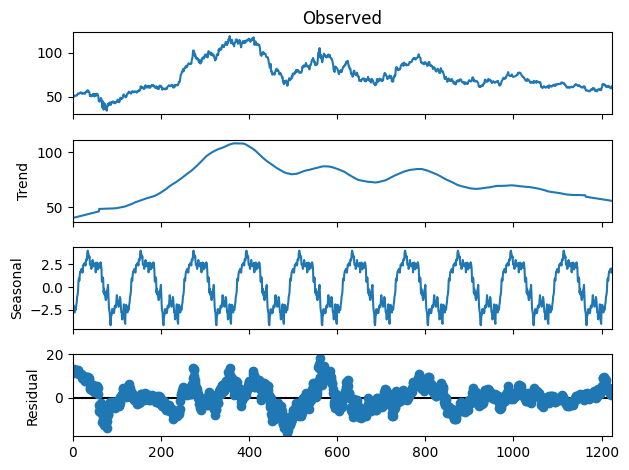

In [17]:
EMPRESA = 'VALE3.SA'

df_full = get_data_ticker(EMPRESA, period='5y')
df = df_full.dropna()

dates, X, y = funcs.split_df_X_y(df)

result = seasonal_decompose(y, period=120, extrapolate_trend='freq')

trend = result.trend

result.plot()
plt.show()

In [9]:
data_hist = pd.DataFrame()
data_hist['trend'] = trend

data_hist['mm5'] = data_hist['trend'].rolling(5).mean()
data_hist['mm15'] = data_hist['trend'].rolling(15).mean()
data_hist['mm30'] = data_hist['trend'].rolling(30).mean()

data_hist = data_hist.dropna()

X = data_hist.iloc[:, 1:]
y = data_hist.iloc[:, 0]

pctTreino = .7

X_train, y_train = X.iloc[:int(len(X) * pctTreino)], y.iloc[:int(len(y) * pctTreino)]  
X_test, y_test = X.iloc[int(len(X) * pctTreino):], y.iloc[int(len(y) * pctTreino):]   

Parâmetro C = 0.1
r2: 0.8323863598664546

mae: 0.8717624557105075

mse: 1.1742628285800716

Parâmetro C = 0.2
r2: 0.7447494762589664

mae: 1.0653748633530205

mse: 1.7882267920789818

Parâmetro C = 0.3
r2: 0.7138473364209756

mae: 1.1648061719945404

mse: 2.0047201162883024

Parâmetro C = 0.4
r2: 0.7330382113511049

mae: 1.1135524177078664

mse: 1.8702732355903753

Parâmetro C = 0.5
r2: 0.8913713116826806

mae: 0.7509716685302371

mse: 0.7610277463505158

Parâmetro C = 0.6
r2: 0.5843892155805965

mae: 1.3839919914161531

mse: 2.911674103085348

Parâmetro C = 0.7
r2: 0.9418358108630378

mae: 0.5538493353606625

mse: 0.4074850066117397

Parâmetro C = 0.8
r2: -0.7987930413715636

mae: 2.882246284083835

mse: 12.601932653620505

Parâmetro C = 0.9
r2: 0.4789714531164886

mae: 1.47902276824816

mse: 3.650206837265322

Parâmetro C = 1.0
r2: 0.4686512490504281

mae: 1.5105724354213221

mse: 3.7225078266626066



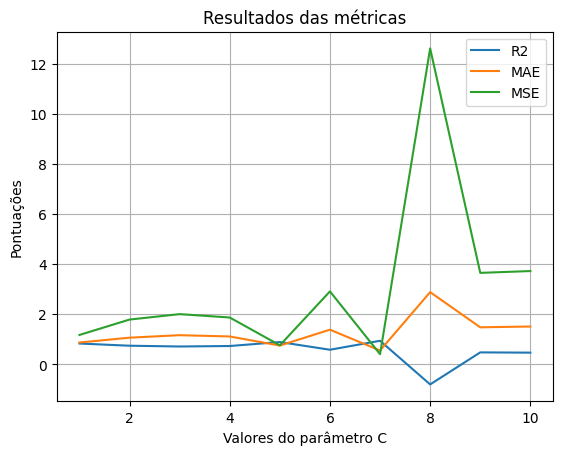

In [24]:
r2s = []
maes = []
mses = []

# Valores para o eixo x 
c_values = [i * 0.1 for i in range(1, 11)]

for c in c_values:    
    c = c/10 
    svr = SVR(C=c, kernel='poly')
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)    

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    r2s.append(r2)
    maes.append(mae)
    mses.append(mse)
    
    print(f"Parâmetro C = {c}")
    print(f"r2: {r2}\n")
    print(f"mae: {mae}\n")
    print(f"mse: {mse}\n")
    



# Adicionando rótulos aos eixos
plt.plot(c_values, r2s, label='R2')
plt.plot(c_values, maes, label='MAE')
plt.plot(c_values, mses, label='MSE')

plt.xlabel('Valores do parâmetro C')
plt.ylabel('Pontuações')
plt.title('Resultados das métricas')
plt.legend()  
plt.grid(True)
plt.show()



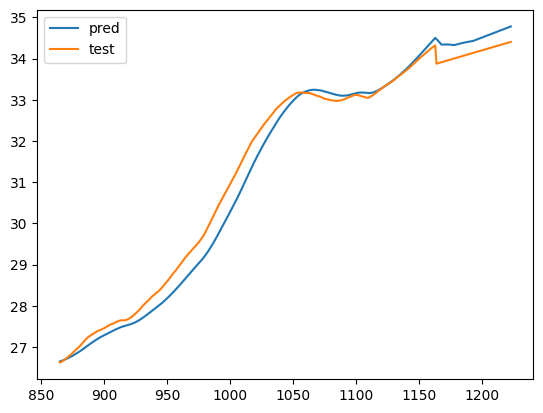

R2: 0.9829353122247845
MAE: 0.27332066408683947
MSE: 0.11500252406495315


In [11]:
svr = SVR(C=0.01, epsilon=1, kernel='poly')

svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

# Alinha o índice de y_pred com o de y_test
y_pred = pd.Series(y_pred, index=y_test.index)

plt.plot(y_pred, label='pred')
plt.plot(y_test, label='test')
plt.legend()
plt.show()

print(f"R2: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

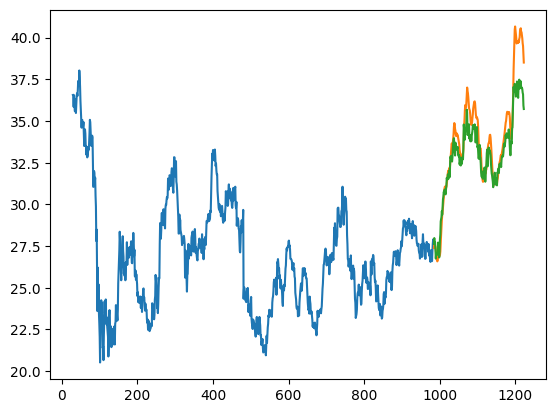

In [6]:
# Alinha o índice de y_pred com o de y_test
y_pred = pd.Series(y_pred, index=y_test.index)

plt.plot(y_train)
plt.plot(y_pred)
plt.plot(y_test)